In [ ]:
# required libraries
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


# 1. Load datasets

In [2]:
start = "2016-01-01 00:00:00"
end = "2019-12-31 23:30:00"

## 1.1. Electricity demand dataset

In [3]:
# 1. electricty demand data
demand = pd.read_csv("./Shared/totaldemand_nsw.csv/totaldemand_nsw.csv")
print(demand.head())
print(demand.tail())
print(demand.dtypes)
print("Number of duplicate rows:", demand.duplicated().sum()) #Check number of duplicate rows

        DATETIME  TOTALDEMAND REGIONID
0  1/1/2010 0:00      8038.00     NSW1
1  1/1/2010 0:30      7809.31     NSW1
2  1/1/2010 1:00      7483.69     NSW1
3  1/1/2010 1:30      7117.23     NSW1
4  1/1/2010 2:00      6812.03     NSW1
               DATETIME  TOTALDEMAND REGIONID
196508  17/3/2021 22:00      7419.77     NSW1
196509  17/3/2021 22:30      7417.91     NSW1
196510  17/3/2021 23:00      7287.32     NSW1
196511  17/3/2021 23:30      7172.39     NSW1
196512   18/3/2021 0:00      7094.51     NSW1
DATETIME        object
TOTALDEMAND    float64
REGIONID        object
dtype: object
Number of duplicate rows: 0


In [4]:
# Convert DATETIME column to datetime format
demand["DATETIME"] = pd.to_datetime(demand["DATETIME"], dayfirst=True)
print(demand.head())


             DATETIME  TOTALDEMAND REGIONID
0 2010-01-01 00:00:00      8038.00     NSW1
1 2010-01-01 00:30:00      7809.31     NSW1
2 2010-01-01 01:00:00      7483.69     NSW1
3 2010-01-01 01:30:00      7117.23     NSW1
4 2010-01-01 02:00:00      6812.03     NSW1


In [5]:
demand = demand[(demand["DATETIME"] >= start) & (demand["DATETIME"] <= end)]
demand['DATE'] = demand['DATETIME'].dt.date
demand = demand.drop(["REGIONID"], axis=1)
print(demand.head())
print(demand.shape)

                  DATETIME  TOTALDEMAND        DATE
105168 2016-01-01 00:00:00      7139.95  2016-01-01
105169 2016-01-01 00:30:00      6976.20  2016-01-01
105170 2016-01-01 01:00:00      6751.26  2016-01-01
105171 2016-01-01 01:30:00      6421.49  2016-01-01
105172 2016-01-01 02:00:00      6125.98  2016-01-01
(70128, 3)


In [6]:
print("No. of dates (long format) in electricity demand data:", demand["DATETIME"].nunique())
print("Unique dates in electricity demand data:", demand["DATE"].nunique())

No. of dates (long format) in electricity demand data: 70128
Unique dates in electricity demand data: 1461


## 1.2. Temperature dataset

In [7]:
# Temperature data
temp = pd.read_csv("./Shared/temperature_nsw.csv/temperature_nsw.csv")
print(temp.head())
print(temp.tail())
print(temp.dtypes)

    LOCATION       DATETIME  TEMPERATURE
0  Bankstown  1/1/2010 0:00         23.1
1  Bankstown  1/1/2010 0:01         23.1
2  Bankstown  1/1/2010 0:30         22.9
3  Bankstown  1/1/2010 0:50         22.7
4  Bankstown  1/1/2010 1:00         22.6
         LOCATION         DATETIME  TEMPERATURE
220321  Bankstown  17/3/2021 23:00         19.1
220322  Bankstown  17/3/2021 23:20         19.0
220323  Bankstown  17/3/2021 23:30         18.8
220324  Bankstown  17/3/2021 23:34         18.8
220325  Bankstown   18/3/2021 0:00         18.6
LOCATION        object
DATETIME        object
TEMPERATURE    float64
dtype: object


In [8]:
#Check number of duplicate rows
print("Number of duplicate rows:", temp.duplicated().sum())

temp = temp.drop_duplicates().reset_index(drop=True)
print("Temperature data after removing duplicates:", temp.shape)

Number of duplicate rows: 13
Temperature data after removing duplicates: (220313, 3)


In [9]:
#Data between 2016-01-01 and 2019-12-31
temp["DATETIME"] = pd.to_datetime(temp["DATETIME"], dayfirst=True)
print(temp.head(10))
print(temp.shape)

    LOCATION            DATETIME  TEMPERATURE
0  Bankstown 2010-01-01 00:00:00         23.1
1  Bankstown 2010-01-01 00:01:00         23.1
2  Bankstown 2010-01-01 00:30:00         22.9
3  Bankstown 2010-01-01 00:50:00         22.7
4  Bankstown 2010-01-01 01:00:00         22.6
5  Bankstown 2010-01-01 01:30:00         22.5
6  Bankstown 2010-01-01 02:00:00         22.5
7  Bankstown 2010-01-01 02:30:00         22.4
8  Bankstown 2010-01-01 03:00:00         22.3
9  Bankstown 2010-01-01 03:30:00         22.3
(220313, 3)


In [10]:
#Data between 2016-01-01 and 2019-12-31
temp["DATETIME"] = pd.to_datetime(temp["DATETIME"], dayfirst=True)
temp['DATE'] = temp['DATETIME'].dt.date
temp = temp[(temp["DATETIME"] >= start) & (temp["DATETIME"] <= end)]
print(temp.head(10))
print(temp.shape)

         LOCATION            DATETIME  TEMPERATURE        DATE
117690  Bankstown 2016-01-01 00:00:00         16.9  2016-01-01
117691  Bankstown 2016-01-01 00:30:00         16.8  2016-01-01
117692  Bankstown 2016-01-01 01:00:00         17.0  2016-01-01
117693  Bankstown 2016-01-01 01:30:00         17.1  2016-01-01
117694  Bankstown 2016-01-01 02:00:00         16.6  2016-01-01
117695  Bankstown 2016-01-01 02:30:00         16.2  2016-01-01
117696  Bankstown 2016-01-01 03:00:00         16.0  2016-01-01
117697  Bankstown 2016-01-01 03:30:00         16.1  2016-01-01
117698  Bankstown 2016-01-01 04:00:00         15.7  2016-01-01
117699  Bankstown 2016-01-01 04:30:00         15.4  2016-01-01
(78527, 4)


In [162]:
# Check rows with missing temperature after merge
na_temp = temp[temp["TEMPERATURE"].isna()]
print("Number of missing temperature rows:", na_temp.shape[0])

Number of missing temperature rows: 0


In [11]:
# Merge on DATETIME
merged = pd.merge(demand, temp[["DATETIME", "TEMPERATURE"]], on="DATETIME", how="left")
print("Shape after merge:", merged.shape)
print(merged.head())
print("No. of dates (long format) in merged data:", merged["DATETIME"].nunique())
print("Unique dates in merged data:", merged["DATE"].nunique())

Shape after merge: (70128, 4)
             DATETIME  TOTALDEMAND        DATE  TEMPERATURE
0 2016-01-01 00:00:00      7139.95  2016-01-01         16.9
1 2016-01-01 00:30:00      6976.20  2016-01-01         16.8
2 2016-01-01 01:00:00      6751.26  2016-01-01         17.0
3 2016-01-01 01:30:00      6421.49  2016-01-01         17.1
4 2016-01-01 02:00:00      6125.98  2016-01-01         16.6
No. of dates (long format) in merged data: 70128
Unique dates in merged data: 1461


In [12]:
# Check rows with missing temperature after merge
missing_temp = merged[merged["TEMPERATURE"].isna()]

print("Number of missing temperature rows:", missing_temp.shape[0])
print("First few missing rows:")
print(missing_temp.head())

Number of missing temperature rows: 250
First few missing rows:
               DATETIME  TOTALDEMAND        DATE  TEMPERATURE
349 2016-01-08 06:30:00      7074.54  2016-01-08          NaN
350 2016-01-08 07:00:00      7318.20  2016-01-08          NaN
351 2016-01-08 07:30:00      7522.06  2016-01-08          NaN
352 2016-01-08 08:00:00      7703.92  2016-01-08          NaN
357 2016-01-08 10:30:00      7910.10  2016-01-08          NaN


In [13]:
temp.loc[temp["DATETIME"] == "2016-01-08 06:30:00", ]

,LOCATION,DATETIME,TEMPERATURE,DATE


In [14]:
#Fill remaining missing values using time interpolation
merged = merged.set_index("DATETIME")
merged["TEMPERATURE"] = merged["TEMPERATURE"].interpolate(method="time", limit_direction="both")

# Check again if any missing remains
print("Number of missing temperature rows after fill:",
      merged["TEMPERATURE"].isna().sum())

Number of missing temperature rows after fill: 0


## 1.3. Electricity price dataset

In [15]:
# 3. Electricity price data (RRP: RRP refers to the average spot price ($/MWh) per region for each day)
price = pd.read_csv("./Downloaded/NSW_prices_2016_2019.csv")
print(price.head())
print(price.tail())
print(price.dtypes)

        SETTLEMENTDATE REGIONID  INTERVENTION       RRP  RAISE6SECRRP  \
0  2016-01-01 00:05:00     NSW1             0  38.43291           2.0   
1  2016-01-01 00:10:00     NSW1             0  36.09407           2.0   
2  2016-01-01 00:15:00     NSW1             0  41.39000           2.8   
3  2016-01-01 00:20:00     NSW1             0  35.01000           2.8   
4  2016-01-01 00:25:00     NSW1             0  35.01000           2.8   

   RAISE60SECRRP  RAISE5MINRRP  RAISEREGRRP  LOWER6SECRRP  LOWER60SECRRP  \
0           1.86           0.8          0.8          0.02           0.06   
1           1.86           0.8          0.8          0.02           0.06   
2           1.86           0.9          0.9          0.02           0.06   
3           2.00           0.8          0.8          0.02           0.06   
4           2.00           0.8          0.8          0.02           0.06   

   LOWER5MINRRP  LOWERREGRRP PRICE_STATUS  
0          0.45          2.8         FIRM  
1          0.20 

In [16]:
#Check number of duplicate rows
print("Number of duplicate rows:", price.duplicated().sum())
# drop duplicate rows
price = price.drop_duplicates().reset_index(drop=True)
print("Price data after removing duplicates:", price.shape)

Number of duplicate rows: 2016
Price data after removing duplicates: (455974, 13)


In [17]:
price = price.rename(columns={'SETTLEMENTDATE': "DATETIME"}) #renaming the Date column
price["DATETIME"] = pd.to_datetime(price["DATETIME"], format="%Y-%m-%d %H:%M:%S")
price["DATE"] = price["DATETIME"].dt.date #DATETIME to datetime type
price= price[["DATETIME", "DATE", "RRP"]] #Keep only Date and RRP ()
print(price.head())
print(price.dtypes)

             DATETIME        DATE       RRP
0 2016-01-01 00:05:00  2016-01-01  38.43291
1 2016-01-01 00:10:00  2016-01-01  36.09407
2 2016-01-01 00:15:00  2016-01-01  41.39000
3 2016-01-01 00:20:00  2016-01-01  35.01000
4 2016-01-01 00:25:00  2016-01-01  35.01000
DATETIME    datetime64[ns]
DATE                object
RRP                float64
dtype: object


In [18]:
print("No. of dates (long format) in electricity demand data:", price["DATETIME"].nunique())
print("Unique dates in electricity demand data:", price["DATE"].nunique())

No. of dates (long format) in electricity demand data: 411839
Unique dates in electricity demand data: 1431


         DATE        RRP
0  2016-01-01  38.168282
1  2016-01-02  36.900947
2  2016-01-03  31.945822
3  2016-01-04  33.323482
4  2016-01-05  33.204041
(1431, 2)


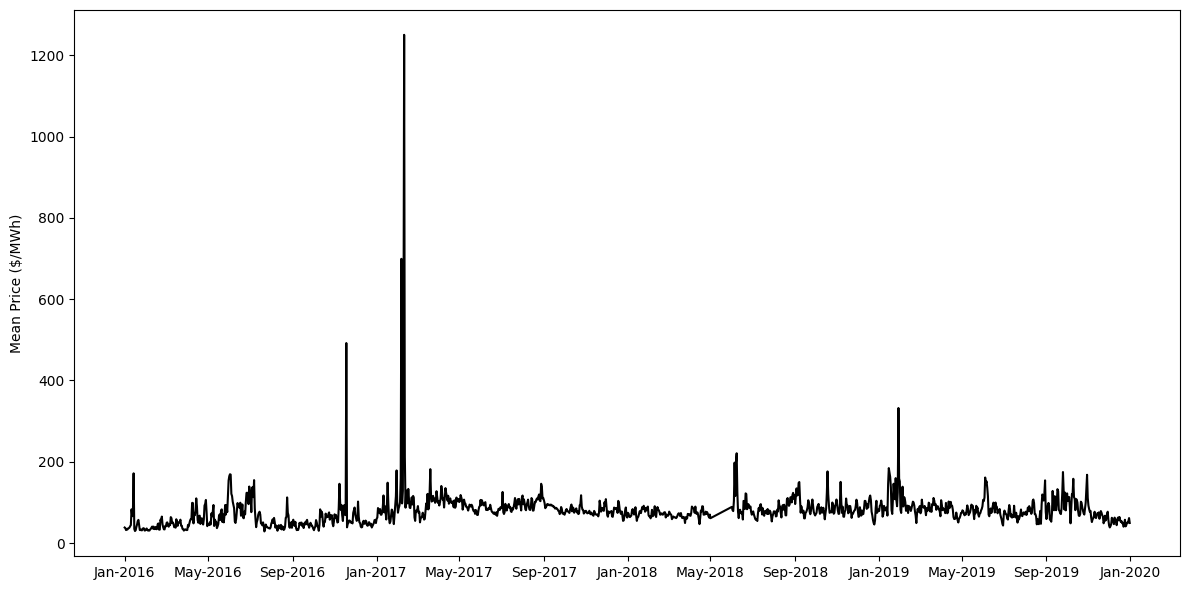

In [19]:
daily_price = price.groupby(['DATE'])['RRP'].mean().reset_index()
print(daily_price.head())
print(daily_price.shape)

# Daily mean prices plot
plt.figure(figsize=(12,6))
plt.plot(daily_price['DATE'], daily_price['RRP'], color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=4))  #for every 4 months
plt.ylabel("Mean Price ($/MWh)")
plt.tight_layout()
plt.show()
#NOTE: very high prices at some points. Will remove these prices in half-hourly data, and then calculate mean prices on daily basis again.

         DATE        RRP
0  2016-01-01  38.168282
1  2016-01-02  36.900947
2  2016-01-03  31.945822
3  2016-01-04  33.323482
4  2016-01-05  33.204041
            DATE        RRP
1426  2019-12-27  50.178105
1427  2019-12-28  49.248870
1428  2019-12-29  53.992527
1429  2019-12-30  56.813776
1430  2019-12-31  49.354541
(1431, 2)


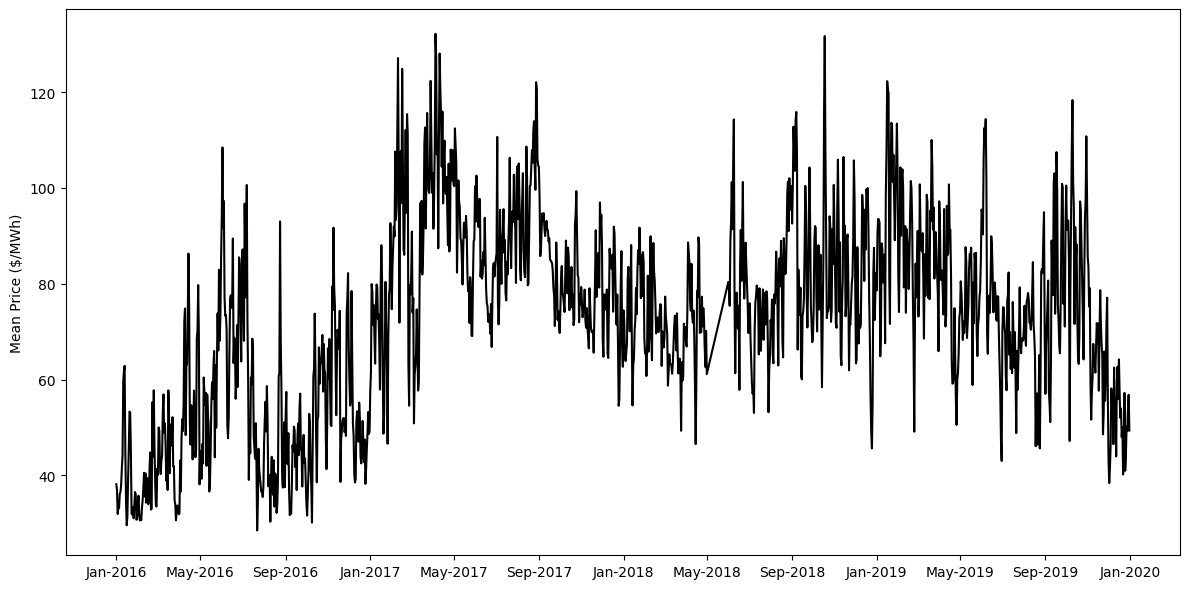

In [20]:
# replace RRP > 200 by NA
price0 = price
price0["RRP"] = price0["RRP"].where(price0["RRP"] <= 200, pd.NA)

# again convert to daily means (ignores NaN automatically)
price0["DATE"] = pd.to_datetime(price0["DATE"]).dt.date
daily_price0 = price0.groupby("DATE", as_index=False)["RRP"].mean()
print(daily_price0.head())
print(daily_price0.tail())
print(daily_price0.shape)

# cleaned daily mean prices (RRP ≤ 400)
plt.figure(figsize=(12,6))
plt.plot(daily_price0["DATE"], daily_price0["RRP"], color="black")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b-%Y"))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=4))
plt.ylabel("Mean Price ($/MWh)")
plt.tight_layout()
plt.show()


## 1.4. Sunlight exposure dataset

In [78]:
# 5. Sunlight exposure dataset
sun_exp = pd.read_excel("./Downloaded/sunlight_exposure.xlsx")
print(sun_exp.head())
print(sun_exp.tail())
print(sun_exp.dtypes)

sun_exp["DATE"] = pd.to_datetime(sun_exp["DATE"]) #DATETIME to datetime type
print(sun_exp.dtypes)
print(sun_exp.shape)


        DATE  sunlight_exposure
0 2016-01-01               32.3
1 2016-01-02               23.2
2 2016-01-03               12.7
3 2016-01-04                7.6
4 2016-01-05                3.9
           DATE  sunlight_exposure
1456 2019-12-27               30.7
1457 2019-12-28               30.8
1458 2019-12-29               21.8
1459 2019-12-30               26.3
1460 2019-12-31               27.7
DATE                 datetime64[ns]
sunlight_exposure           float64
dtype: object
DATE                 datetime64[ns]
sunlight_exposure           float64
dtype: object
(1461, 2)


In [79]:
print(sun_exp.isna().sum())


DATE                 0
sunlight_exposure    1
dtype: int64


In [80]:
#sun_exp['DATE'] = sun_exp['DATE'].dt.date
sun_exp = sun_exp.set_index("DATE")
# Interpolate using time-based method
sun_exp["sunlight_exposure"] = sun_exp["sunlight_exposure"].interpolate(method="time", limit_direction="both")

# Check again if any missing remains
print("Number of missing sunlight exposure rows after fill:",
      sun_exp["sunlight_exposure"].isna().sum())

Number of missing sunlight exposure rows after fill: 0


## 1.5. Precipitation dataset

In [81]:
# Precipitation dataset
precip = pd.read_csv("./Downloaded/g4.areaAvgTimeSeries.GPCPDAY_3_3_precip.20160101-20191231.141E_37S_153E_28S.csv")
print(precip.head())
print(precip.tail())
print(precip.dtypes)

# some data cleaning
precip = precip.rename(columns={'time': "DATE",
                                ' mean_GPCPDAY_3_3_precip': "precipitation"}) 
precip["DATE"] = pd.to_datetime(precip["DATE"], format="%m/%d/%Y") #convert DATETIME to datetime type
print(precip.head())
print(precip.tail())
print(precip.dtypes)
print(precip.shape)


       time   mean_GPCPDAY_3_3_precip
0  1/1/2016                  2.140095
1  1/2/2016                  6.496326
2  1/3/2016                  8.562486
3  1/4/2016                  4.082204
4  1/5/2016                  9.977372
            time   mean_GPCPDAY_3_3_precip
1456  12/27/2019                  0.081469
1457  12/28/2019                  0.571150
1458  12/29/2019                  0.101862
1459  12/30/2019                  0.243804
1460  12/31/2019                  1.126134
time                         object
 mean_GPCPDAY_3_3_precip    float64
dtype: object
        DATE  precipitation
0 2016-01-01       2.140095
1 2016-01-02       6.496326
2 2016-01-03       8.562486
3 2016-01-04       4.082204
4 2016-01-05       9.977372
           DATE  precipitation
1456 2019-12-27       0.081469
1457 2019-12-28       0.571150
1458 2019-12-29       0.101862
1459 2019-12-30       0.243804
1460 2019-12-31       1.126134
DATE             datetime64[ns]
precipitation           float64
dtype: obj

## 1.6. Forecasted demand dataset

In [24]:
# Forecasted demand
forecast= pd.read_csv("./Shared/forecastdemand_nsw/forecastdemand_nsw.csv")
print(forecast.head())
print(forecast.tail())
print(forecast.dtypes)

# Crop forecast data as well (2016-2019)
forecast["DATETIME"] = pd.to_datetime(forecast["DATETIME"])
forecast = forecast[(forecast["DATETIME"] >= start) & (forecast["DATETIME"] <= end)]

   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2009123018     NSW1        71         7832.04  2009-12-30 12:31:49   
1        2009123019     NSW1        70         7832.04  2009-12-30 13:01:43   
2        2009123020     NSW1        69         7832.03  2009-12-30 13:31:36   
3        2009123021     NSW1        68         7832.03  2009-12-30 14:01:44   
4        2009123022     NSW1        67         7830.96  2009-12-30 14:31:35   

              DATETIME  
0  2010-01-01 00:00:00  
1  2010-01-01 00:00:00  
2  2010-01-01 00:00:00  
3  2010-01-01 00:00:00  
4  2010-01-01 00:00:00  
          PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND  \
10906014        2021031736     NSW1         5         7028.45   
10906015        2021031737     NSW1         4         7041.65   
10906016        2021031738     NSW1         3         7087.60   
10906017        2021031739     NSW1         2         7087.28   
10906018        2021031740     NSW1         1     

In [26]:
#Check number of duplicate rows
print("Number of duplicate rows:", forecast.duplicated().sum())
# removing duplicates
forecast = forecast.drop_duplicates().reset_index(drop=True)
print("forecast data after removing duplicates:", forecast.shape)

Number of duplicate rows: 142
forecast data after removing duplicates: (3891458, 6)


In [27]:
forecast['DATE'] = forecast["DATETIME"].dt.date
print(forecast.head())
print(forecast.tail())

   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2015123018     NSW1        71         6747.49  2015-12-30 12:31:49   
1        2015123019     NSW1        70         6753.88  2015-12-30 13:01:46   
2        2015123020     NSW1        69         6753.85  2015-12-30 13:31:43   
3        2015123021     NSW1        68         6753.57  2015-12-30 14:01:40   
4        2015123022     NSW1        67         6753.44  2015-12-30 14:31:20   

    DATETIME        DATE  
0 2016-01-01  2016-01-01  
1 2016-01-01  2016-01-01  
2 2016-01-01  2016-01-01  
3 2016-01-01  2016-01-01  
4 2016-01-01  2016-01-01  
         PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND  \
3891453        2019123135     NSW1         5         7504.39   
3891454        2019123136     NSW1         4         7491.82   
3891455        2019123137     NSW1         3         7444.02   
3891456        2019123138     NSW1         2         7440.57   
3891457        2019123139     NSW1         

In [28]:
print("No. of dates (long format) in electricity demand data:", forecast["DATETIME"].nunique())
print("Unique dates in electricity demand data:", forecast["DATE"].nunique())

No. of dates (long format) in electricity demand data: 70128
Unique dates in electricity demand data: 1461


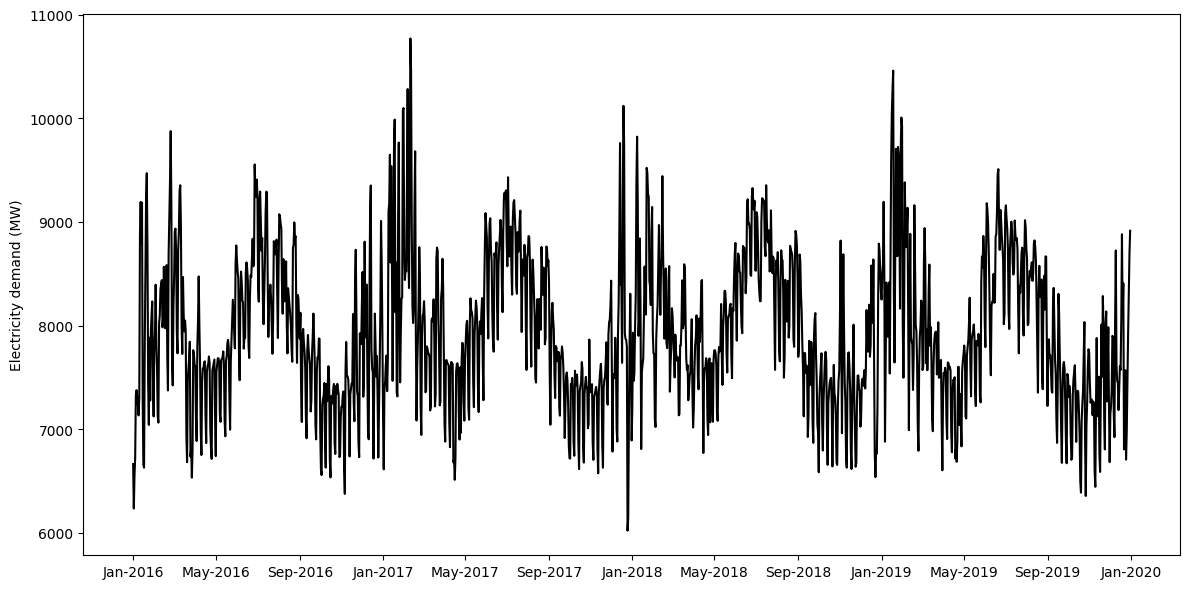

In [29]:
# Transforming 5-min forecasted electricity demand into daily basis
daily_forecast = forecast.groupby('DATE')['FORECASTDEMAND'].mean().reset_index().round(2)
daily_forecast = daily_forecast.rename(columns={'FORECASTDEMAND': "forecast_demand"})

# Daily forecasted electricity demand plot
plt.figure(figsize=(12,6))
plt.plot(daily_forecast['DATE'], daily_forecast['forecast_demand'], color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=4)) 
plt.ylabel("Electricity demand (MW)")
plt.tight_layout()


# 2. Data processing and exploration
First converting the half-hourly dataset into daily basis based on mean values (demand, temperature, prices)

In [82]:
df0 = merged.groupby("DATE", as_index=False)[["TOTALDEMAND", "TEMPERATURE"]].mean()
print(df0.head)
print(df0.shape)

<bound method NDFrame.head of             DATE  TOTALDEMAND  TEMPERATURE
0     2016-01-01  6861.518333    20.783333
1     2016-01-02  6731.957292    20.572917
2     2016-01-03  6618.040000    21.170833
3     2016-01-04  7358.550000    20.277083
4     2016-01-05  7460.061875    18.979167
...          ...          ...          ...
1456  2019-12-27  7508.199792    23.522917
1457  2019-12-28  7694.271458    23.972917
1458  2019-12-29  7746.240833    23.689583
1459  2019-12-30  8321.401042    24.172917
1460  2019-12-31  8503.726875    26.425000

[1461 rows x 3 columns]>
(1461, 3)


In [83]:
# Merge daily_price into df0
df1 = pd.merge(df0, daily_price0, on="DATE", how="left")
df1["DATE"] = pd.to_datetime(df1["DATE"])

print(df1.head())
print("Shape of df1:", df1.shape)
print("Missing RRP values:", df1["RRP"].isna().sum())


        DATE  TOTALDEMAND  TEMPERATURE        RRP
0 2016-01-01  6861.518333    20.783333  38.168282
1 2016-01-02  6731.957292    20.572917  36.900947
2 2016-01-03  6618.040000    21.170833  31.945822
3 2016-01-04  7358.550000    20.277083  33.323482
4 2016-01-05  7460.061875    18.979167  33.204041
Shape of df1: (1461, 4)
Missing RRP values: 30


In [84]:
#Fill missing values of RRP using time interpolation
df1 = df1.set_index("DATE")
df1["RRP"] = df1["RRP"].interpolate(method="time", limit_direction="both")

# Check again if any missing remains
print("Number of missing RRP rows after fill:",
      df1["RRP"].isna().sum())

Number of missing RRP rows after fill: 0


In [85]:
df2 = pd.merge(df1, sun_exp, on="DATE", how="left")
df3 = pd.merge(df2, precip, on= 'DATE', how= "left")
df3 = df3.rename(columns={"TOTALDEMAND": "demand",
                          "TEMPERATURE": 'temperature', 
                          "RRP": "price"}).round(2)
df3.head()

,DATE,demand,temperature,price,sunlight_exposure,precipitation
0,2016-01-01,6861.52,20.78,38.17,32.3,2.14
1,2016-01-02,6731.96,20.57,36.90,23.2,6.50
2,2016-01-03,6618.04,21.17,31.95,12.7,8.56
3,2016-01-04,7358.55,20.28,33.32,7.6,4.08
4,2016-01-05,7460.06,18.98,33.20,3.9,9.98


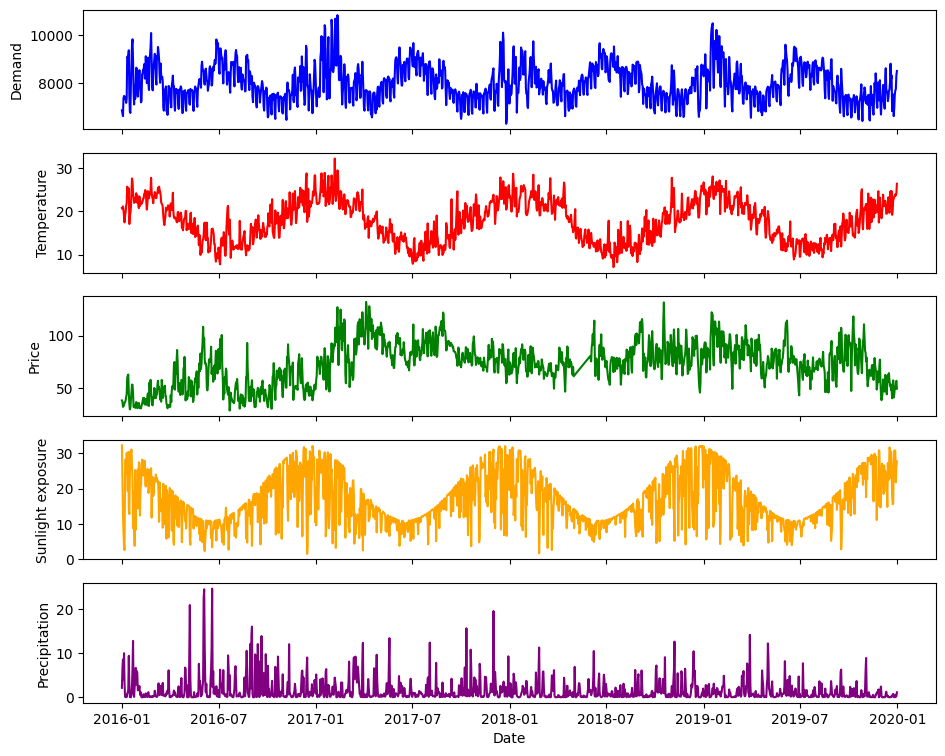

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(11, 9), sharex=True)

# Plot each variable
axes[0].plot(df3["DATE"], df3["demand"], color="blue")
axes[0].set_ylabel("Demand")

axes[1].plot(df3["DATE"], df3["temperature"], color="red")
axes[1].set_ylabel("Temperature")

axes[2].plot(df3["DATE"], df3["price"], color="green")
axes[2].set_ylabel("Price")

axes[3].plot(df3["DATE"], df3["sunlight_exposure"], color="orange")
axes[3].set_ylabel("Sunlight exposure")

axes[4].plot(df3["DATE"], df3["precipitation"], color="purple")
axes[4].set_ylabel("Precipitation")

axes[4].set_xlabel("Date") #common to all

# 3. Feature engineering (a)
Creating dummy variables based on day types.

In [87]:
dat = df3
# adding dummay variables based on types of dates/months
dat['DATE'] = pd.to_datetime(dat['DATE'])
dat['day_of_week'] = dat['DATE'].dt.day_name() #day of the week (0=Monday, 6=Sunday)
dat['is_weekend'] = dat['DATE'].dt.dayofweek >= 5  #True for Sat/Sun
dat['is_weekend'] = dat['is_weekend'].astype(int)  #1 = weekend, 0 = weekday
dat['month'] = dat['DATE'].dt.month
dat['is_summer'] = dat['DATE'].dt.month.isin([12, 1, 2]).astype(int) #Summer dummy (Dec, Jan, Feb in NSW)
dat['is_winter'] = dat['DATE'].dt.month.isin([6, 7, 8]).astype(int) #Winter dummy (Jun, Jul, Aug in NSW)

#one-hot encode day_of_week and month for dummy variables
#dat = pd.get_dummies(dat, columns=['day_of_week', 'month'], drop_first=False)
print(dat.head())
print(dat.tail())


        DATE   demand  temperature  price  sunlight_exposure  precipitation  \
0 2016-01-01  6861.52        20.78  38.17               32.3           2.14   
1 2016-01-02  6731.96        20.57  36.90               23.2           6.50   
2 2016-01-03  6618.04        21.17  31.95               12.7           8.56   
3 2016-01-04  7358.55        20.28  33.32                7.6           4.08   
4 2016-01-05  7460.06        18.98  33.20                3.9           9.98   

  day_of_week  is_weekend  month  is_summer  is_winter  
0      Friday           0      1          1          0  
1    Saturday           1      1          1          0  
2      Sunday           1      1          1          0  
3      Monday           0      1          1          0  
4     Tuesday           0      1          1          0  
           DATE   demand  temperature  price  sunlight_exposure  \
1456 2019-12-27  7508.20        23.52  50.18               30.7   
1457 2019-12-28  7694.27        23.97  49.25     

In [88]:
# Define NSW holidays for your study period
years = range(2016, 2020)
au_holidays = holidays.Australia(state="NSW", years=years)
au_holidays

{datetime.date(2016, 3, 25): 'Good Friday', datetime.date(2016, 3, 28): 'Easter Monday', datetime.date(2016, 1, 1): "New Year's Day", datetime.date(2016, 1, 26): 'Australia Day', datetime.date(2016, 3, 26): 'Easter Saturday', datetime.date(2016, 3, 27): 'Easter Sunday', datetime.date(2016, 4, 25): 'ANZAC Day', datetime.date(2016, 10, 3): 'Labour Day', datetime.date(2016, 6, 13): "Queen's Birthday", datetime.date(2016, 12, 25): 'Christmas Day', datetime.date(2016, 12, 27): 'Christmas Day (observed)', datetime.date(2016, 12, 26): 'Boxing Day', datetime.date(2017, 4, 14): 'Good Friday', datetime.date(2017, 4, 17): 'Easter Monday', datetime.date(2017, 1, 1): "New Year's Day", datetime.date(2017, 1, 2): "New Year's Day (observed)", datetime.date(2017, 1, 26): 'Australia Day', datetime.date(2017, 4, 15): 'Easter Saturday', datetime.date(2017, 4, 16): 'Easter Sunday', datetime.date(2017, 4, 25): 'ANZAC Day', datetime.date(2017, 10, 2): 'Labour Day', datetime.date(2017, 6, 12): "Queen's Birthd

In [89]:
# Ensure comparison on the same type
dat["is_holiday"] = dat["DATE"].dt.date.isin(au_holidays).astype(int)

# Check again
print(dat["is_holiday"].value_counts())
print(dat["is_holiday"].value_counts(normalize=True))


is_holiday
0    1415
1      46
Name: count, dtype: int64
is_holiday
0    0.968515
1    0.031485
Name: proportion, dtype: float64


# 4. Exploratory data analysis

<Axes: xlabel='day_of_week', ylabel='demand'>

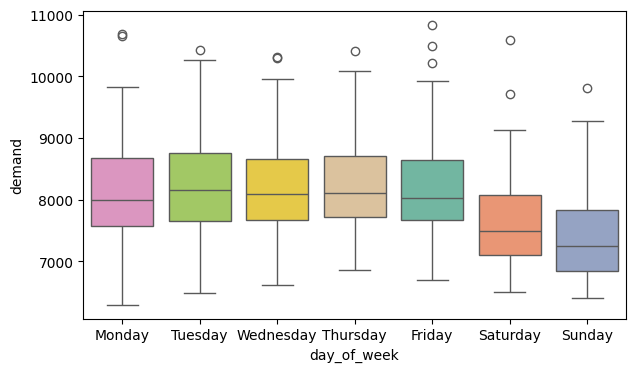

In [90]:
# 1. Demand by day of week
plt.figure(figsize=(7,4))
sns.boxplot(x='day_of_week', y='demand', data=dat, hue='day_of_week',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            palette='Set2')
#NOTE: Similar demand of electricty on weekdays but notably lower demand on weekend

([<matplotlib.axis.XTick at 0x1f7d60b9a60>,
 [Text(0, 0, 'Weekday'), Text(1, 0, 'Weekend')])

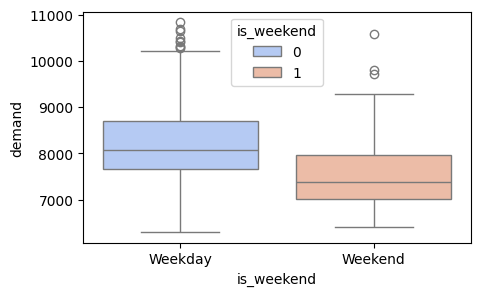

In [250]:
#Daily demand: weekday vs weekend
plt.figure(figsize=(5,3))
sns.boxplot(x='is_weekend', y='demand', hue='is_weekend', data=dat, palette='coolwarm')
plt.xticks([0,1], ["Weekday","Weekend"])

<Axes: xlabel='month', ylabel='demand'>

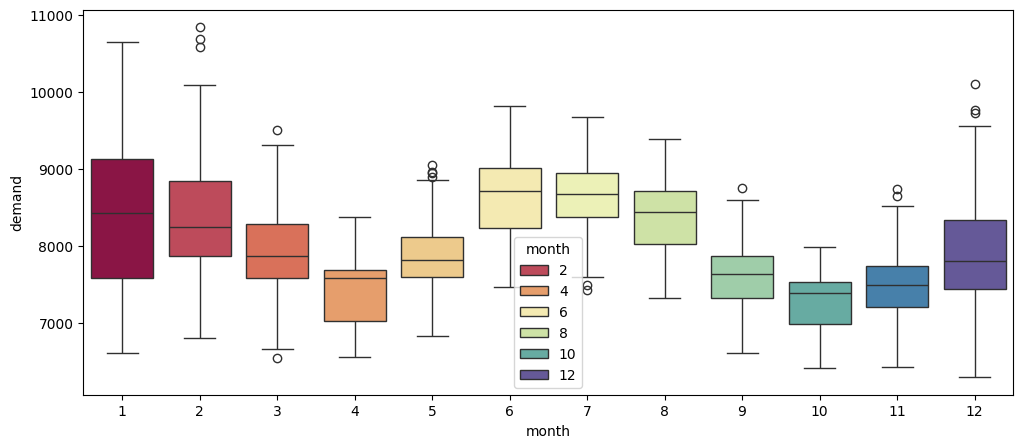

In [251]:
#Electricity demand by month (seasonality)
plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='demand', data=dat, hue='month', palette='Spectral')


<Axes: xlabel='season', ylabel='demand'>

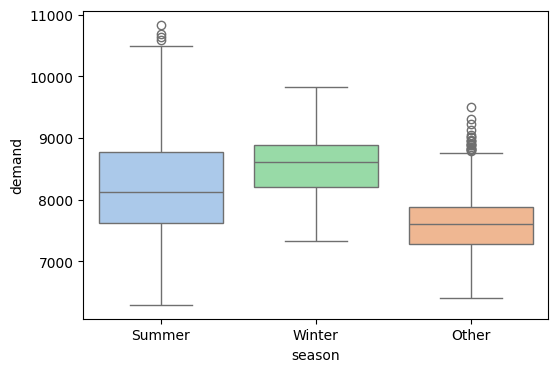

In [253]:
#Seasonal comparison of electricity demand
dat['season'] = "Other"
dat.loc[dat['is_summer']==1, 'season'] = "Summer"
dat.loc[dat['is_winter']==1, 'season'] = "Winter"

plt.figure(figsize=(6, 4))
sns.boxplot(x='season', y='demand', hue='season', data=dat, 
            order=['Summer','Winter','Other'], palette='pastel')

Text(0, 0.5, 'Daily Demand (MW)')

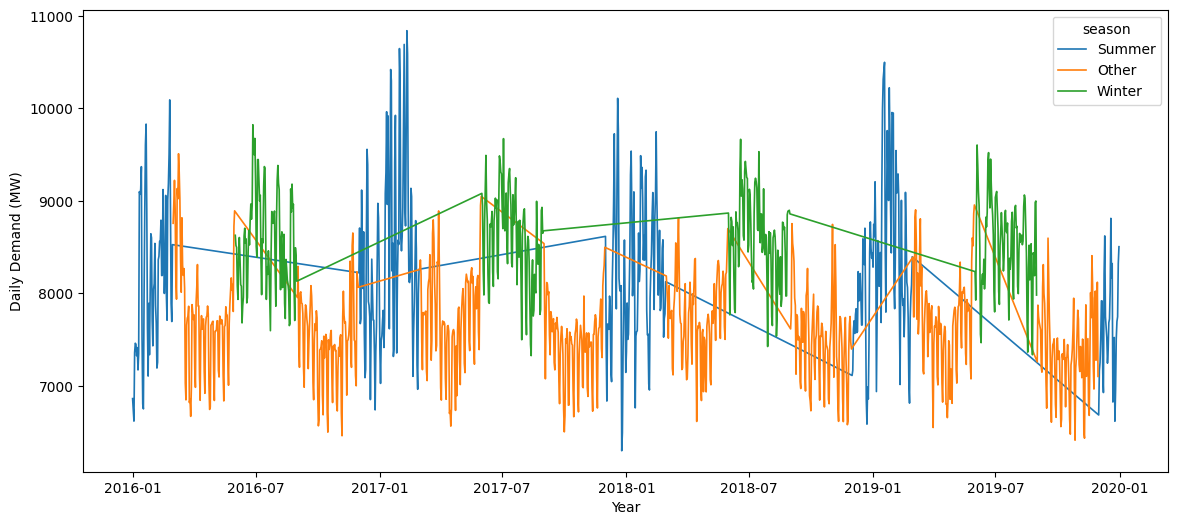

In [254]:
# Electricity demand trend with seasonal trend over time
plt.figure(figsize=(14,6))
sns.lineplot(x='DATE', y='demand', hue='season', data=dat, linewidth=1.2)
plt.xlabel("Year")
plt.ylabel("Daily Demand (MW)")

<Axes: >

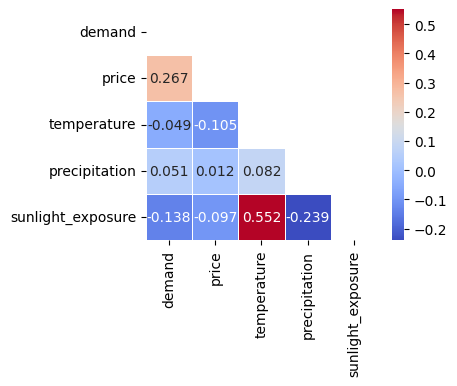

In [91]:
corr_vars = ["demand", "price", "temperature", "precipitation", "sunlight_exposure"]
corr_data = dat[corr_vars]
corr_matrix = corr_data.corr() #correlation matrix

# correlation heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) #for lower diagonal matrix only
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".3f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=0.5)

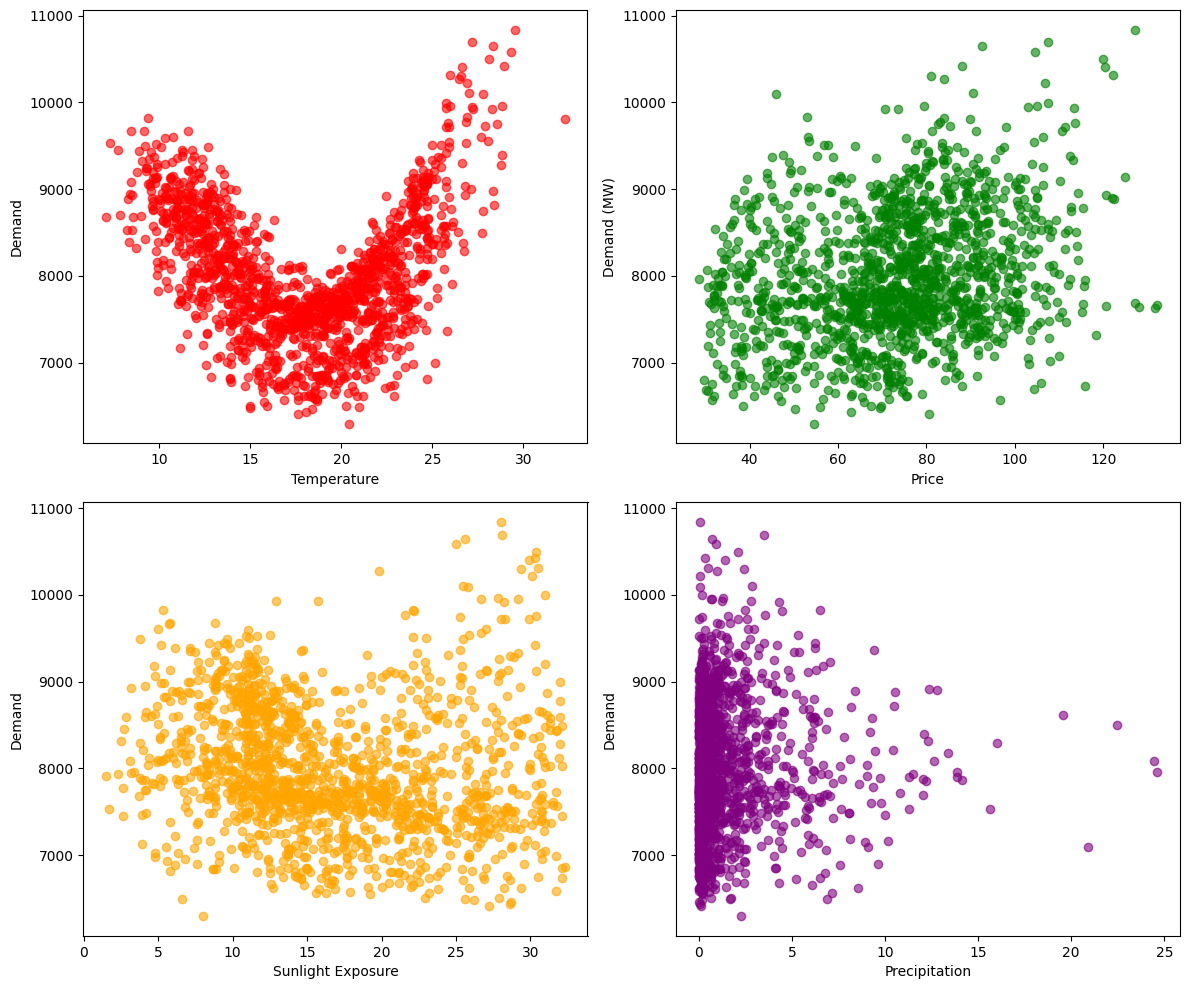

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter: Demand vs Temperature
axes[0, 0].scatter(dat["temperature"], dat["demand"], color="red", alpha=0.6)
axes[0, 0].set_xlabel("Temperature")
axes[0, 0].set_ylabel("Demand")

# Scatter: Demand vs Price
axes[0, 1].scatter(dat["price"], dat["demand"], color="green", alpha=0.6)
axes[0, 1].set_xlabel("Price")
axes[0, 1].set_ylabel("Demand (MW)")

# Scatter: Demand vs Sunlight Exposure
axes[1, 0].scatter(dat["sunlight_exposure"], dat["demand"], color="orange", alpha=0.6)
axes[1, 0].set_xlabel("Sunlight Exposure")
axes[1, 0].set_ylabel("Demand")

# Scatter: Demand vs Precipitation
axes[1, 1].scatter(dat["precipitation"], dat["demand"], color="purple", alpha=0.6)
axes[1, 1].set_xlabel("Precipitation")
axes[1, 1].set_ylabel("Demand")

plt.tight_layout()


# 5. Feature engineering (b)

Checking polynomial regressions for Temperature and Precipitation to decide the no. of polynomial of these against response (Demand).

In [93]:
dat0= dat

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     840.7
Date:                Mon, 08 Sep 2025   Prob (F-statistic):          1.50e-243
Time:                        02:20:50   Log-Likelihood:                -11184.
No. Observations:                1461   AIC:                         2.237e+04
Df Residuals:                    1458   BIC:                         2.239e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.497e+04    174.726     85.667   

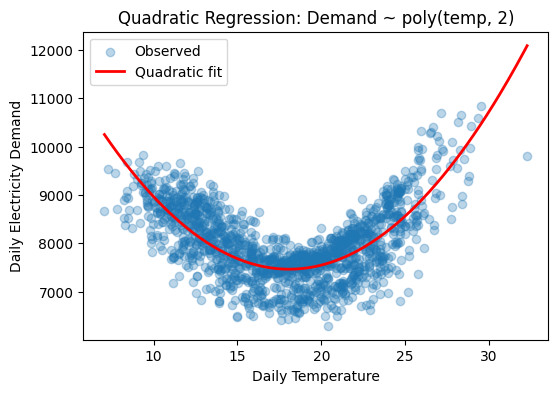

In [94]:
# fit polynomial regression
dat0["temperature2"] = dat0["temperature"]**2
poly_mod0 = smf.ols("demand ~ temperature + temperature2", data=dat0).fit()
print(poly_mod0.summary())

# prediction line for plotting
temp_range = np.linspace(dat0["temperature"].min(), dat0["temperature"].max(), 200)
pred_df = pd.DataFrame({"temperature": temp_range,
                        "temperature2": temp_range**2})
pred_df["predicted_demand"] = poly_mod0.predict(pred_df)

# plot
plt.figure(figsize=(6,4))
plt.scatter(dat0["temperature"], dat0["demand"], alpha=0.3, label="Observed")
plt.plot(pred_df["temperature"], pred_df["predicted_demand"], color="red", linewidth=2, label="Quadratic fit")
plt.xlabel("Daily Temperature")
plt.ylabel("Daily Electricity Demand")
plt.title("Quadratic Regression: Demand ~ poly(temp, 2)")
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.230
Date:                Mon, 08 Sep 2025   Prob (F-statistic):            0.00545
Time:                        02:20:58   Log-Likelihood:                -11739.
No. Observations:                1461   AIC:                         2.348e+04
Df Residuals:                    1458   BIC:                         2.350e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7948.5016     25.185    315.

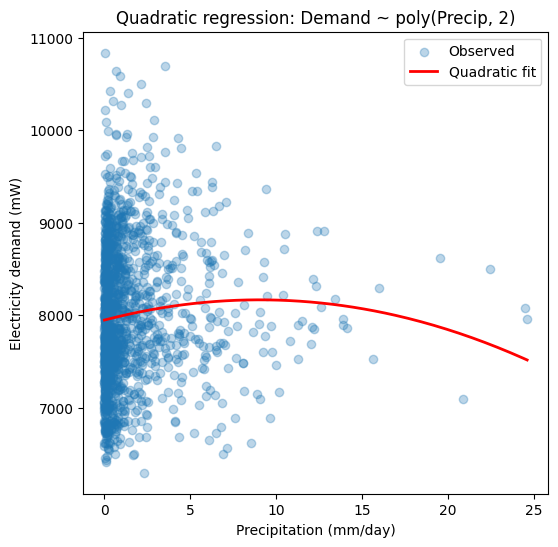

In [95]:
# fit polynomial regression with precipitation
dat0["precipitation2"] = dat0["precipitation"]**2
poly_mod1 = smf.ols("demand ~ precipitation + precipitation2", data=dat0).fit()
print(poly_mod1.summary())

# prediction line for plotting
precip_range = np.linspace(dat0["precipitation"].min(), dat0["precipitation"].max(), 200)
pred_precip = pd.DataFrame({"precipitation": precip_range,
                            "precipitation2": precip_range**2})
pred_precip["predicted_demand"] = poly_mod1.predict(pred_precip)

# plot
plt.figure(figsize=(6,6))
plt.scatter(dat0["precipitation"], dat0["demand"], alpha=0.3, label="Observed")
plt.plot(pred_precip["precipitation"], pred_precip["predicted_demand"], color="red", linewidth=2, label="Quadratic fit")
plt.xlabel("Precipitation (mm/day)")
plt.ylabel("Electricity demand (mW)")
plt.title("Quadratic regression: Demand ~ poly(Precip, 2)")
plt.legend()


# 6. Train-Test split

In [96]:
reg_dat = dat0
print(reg_dat.head())
print(reg_dat.dtypes)
#reg_dat.to_excel("regression_data.xlsx", index=False)

# Split into train (2016–2018) and test (2019)
train = reg_dat[(reg_dat["DATE"] >= "2016-01-01") & (reg_dat["DATE"] <= "2018-12-31")]
test = reg_dat[(reg_dat["DATE"] >= "2019-01-01") & (reg_dat["DATE"] <= "2019-12-31")]
print("Train shape:", train.shape)
print("Test shape:", test.shape)

        DATE   demand  temperature  price  sunlight_exposure  precipitation  \
0 2016-01-01  6861.52        20.78  38.17               32.3           2.14   
1 2016-01-02  6731.96        20.57  36.90               23.2           6.50   
2 2016-01-03  6618.04        21.17  31.95               12.7           8.56   
3 2016-01-04  7358.55        20.28  33.32                7.6           4.08   
4 2016-01-05  7460.06        18.98  33.20                3.9           9.98   

  day_of_week  is_weekend  month  is_summer  is_winter  is_holiday  \
0      Friday           0      1          1          0           1   
1    Saturday           1      1          1          0           0   
2      Sunday           1      1          1          0           0   
3      Monday           0      1          1          0           0   
4     Tuesday           0      1          1          0           0   

   temperature2  precipitation2  
0      431.8084          4.5796  
1      423.1249         42.2500  
2 

# 7. Regression analysis

In [63]:
# create a year column from DATE
#reg_dat["year"] = reg_dat["DATE"].dt.year
#eg_dat.head()

In [97]:
# MLR regression
mod0 = smf.ols("demand ~ temperature + temperature2+ precipitation + price+ sunlight_exposure+ is_weekend + " \
"is_summer + is_winter + is_holiday + price:is_summer + price:is_winter + temperature:is_weekend", 
               data=train).fit()
print(mod0.summary())


                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     503.5
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:21:11   Log-Likelihood:                -7762.9
No. Observations:                1096   AIC:                         1.555e+04
Df Residuals:                    1083   BIC:                         1.562e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.29

In [98]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define predictors and target
features = ["temperature", "temperature2", "precipitation", "price", "sunlight_exposure", "is_weekend", 
            "is_summer", "is_winter", "is_holiday"]
target = "demand"

X = train[features]
y = train[target]
print(X.head())

xtrain, ytrain = X, y
xtest, ytest = test[features], test[target]

   temperature  temperature2  precipitation  price  sunlight_exposure  \
0        20.78      431.8084           2.14  38.17               32.3   
1        20.57      423.1249           6.50  36.90               23.2   
2        21.17      448.1689           8.56  31.95               12.7   
3        20.28      411.2784           4.08  33.32                7.6   
4        18.98      360.2404           9.98  33.20                3.9   

   is_weekend  is_summer  is_winter  is_holiday  
0           0          1          0           1  
1           1          1          0           0  
2           1          1          0           0  
3           0          1          0           0  
4           0          1          0           0  


In [101]:
# Initialize model
model = LinearRegression()

# Define 5-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores (R²)
cv_r2 = cross_val_score(model, X, y, cv=kf, scoring="r2")
cv_mse = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
cv_mae = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

print("R² scores:", cv_r2)
print("Mean R²:", np.mean(cv_r2))
print("MSE scores:", cv_mse)
print("Mean MSE:", np.mean(cv_mse))
print("MAE scores:", cv_mae)
print("Mean MAE:", np.mean(cv_mae))

R² scores: [0.88419311 0.80609356 0.81769503 0.86615178 0.82140146 0.84671409
 0.8416279  0.80274361 0.85213254 0.85907687]
Mean R²: 0.8397829939296448
MSE scores: [ 63187.76628602  88747.8983587   88095.48002621  61002.71280912
 114423.18645026  87242.19143917  85662.91021308 107202.1449133
  81100.75094974  91064.17148577]
Mean MSE: 86772.92129313652
MAE scores: [188.00272008 229.17427897 233.1424855  192.35963894 256.19215242
 228.43443836 216.15811311 233.9826386  204.40346666 227.34594284]
Mean MAE: 220.91958754855628


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Prepare features (including squared and interaction terms)
train0 = train.copy()
train0["temperature2"] = train0["temperature"] ** 2
train0["price_is_summer"] = train0["price"] * train0["is_summer"]
train0["price_is_winter"] = train0["price"] * train0["is_winter"]
train0["temp_is_weekend"] = train0["temperature"] * train0["is_weekend"]

X = train0[["temperature", "temperature2", "precipitation", "price", 
           "sunlight_exposure", "is_weekend", "is_summer", "is_winter", 
           "price_is_summer", "price_is_winter", "temp_is_weekend", "is_holiday"]]

y = train0["demand"]

# Define model
model0 = LinearRegression()

# 10-fold cross validation
kf0 = KFold(n_splits=10, shuffle=True, random_state=42)
scores0 = cross_val_score(model0, X, y, cv=kf, scoring="r2")

print("R² scores for each fold:", scores0)
print("Mean R² across 10 folds:", np.mean(scores0))
print("Std of R² across 10 folds:", np.std(scores0))


R² scores for each fold: [0.88581044 0.8016332  0.82171585 0.87361684 0.82810464 0.83579199
 0.84474286 0.80933191 0.86028012 0.85011071]
Mean R² across 10 folds: 0.8411138542420679
Std of R² across 10 folds: 0.025803771723182538


##### Let's try mixed effect regression to incorporate variation across months or years

In [66]:
reg_dat0 = reg_dat.reset_index(drop=True)
reg_dat0["year"] = reg_dat0["year"].astype("category")
reg_dat0.head()

,DATE,daily_demand,daily_temperature,daily_precip,day_of_week,is_weekend,month,is_summer,is_winter,season,year,temp2,precip2
0,2016-01-01,6861.52,20.704082,2.140095,Friday,0,1,1,0,Summer,2016,428.658996,4.580009
1,2016-01-02,6731.96,20.572917,6.496326,Saturday,1,1,1,0,Summer,2016,423.244900,42.202257
2,2016-01-03,6618.04,21.130769,8.562486,Sunday,1,1,1,0,Summer,2016,446.509408,73.316161
3,2016-01-04,7358.55,20.144444,4.082204,Monday,0,1,1,0,Summer,2016,405.798642,16.664392
4,2016-01-05,7460.06,18.904808,9.977372,Tuesday,0,1,1,0,Summer,2016,357.391754,99.547955
